## This notebook assumes you have the following packages installed in your conda environment.

In [1]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [2]:
df_default = pd.read_csv('scripts-data/run_1/default-nd.csv')
df_default.shape


(2728, 171)

In [110]:
df_sign = pd.read_csv('scripts-data/run_1/signdata.csv')
df_sign.shape
df_sign.head()

,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,SignBankReferenceID,SignBankLemmaID,SignBankAnnotationID,SignBankSemanticField,SignBankEnglishTranslations,Complexity
0,&=arms-cross,&=arms-cross,J_01_098,"<iframe width=""280"" height=""158"" src=""https://...",3.467,2.177,-0.458,30,0,3.400,...,0,2,NaN,&=arms-cross,1961.0,&=arms-cross,NaN,None,"action, arms crossed, stern look, what, what h...",4.0
1,&=raise-hand,&=raise-hand,H_02_048,"<iframe width=""280"" height=""158"" src=""https://...",5.154,1.891,0.544,28,0,5.500,...,0,2,NaN,&=raise-hand,1954.0,&=raise-hand,NaN,None,"action, I have a question, me, raise hand, vol...",2.0
2,&=sigh,&=sigh,H_03_086,"<iframe width=""280"" height=""158"" src=""https://...",3.931,1.751,-0.196,30,0,3.267,...,0,2,NaN,&=sigh,1957.0,&=sigh,NaN,None,"action, exasperated, I didn't mean that, I giv...",2.0
3,1_dollar,1_dollar,C_02_025,"<iframe width=""280"" height=""158"" src=""https://...",3.034,1.500,-0.775,29,0,2.944,...,383,0,NaN,DOLLAR,1268.0,1_DOLLAR,DOLLAR,None,"bill, cash, dollar, money",2.0
4,5_dollars,5_dollars,B_01_062,"<iframe width=""280"" height=""158"" src=""https://...",5.120,1.716,0.302,25,0,5.214,...,190,4,NaN,FIVE-DOLLARS,2436.0,5_DOLLAR,FIVE-DOLLARS,Number,"dollar, five dollars, money",1.0


In [111]:
df_sign['SignBankEnglishTranslations'].value_counts()

canine, dog, puppy                                                         3
especially, except, special, unique                                        3
cry out, shout, scream, yell                                               3
clip, cut, scissors, snip, trim                                            3
earphones, headphones                                                      2
                                                                          ..
hands off, not me, not my problem, not my responsibility, unaccountable    1
arrogant, brag, braggart, boast, pompous, show off                         1
alcohol, beer, beverage, brew, drink                                       1
crash, fall asleep, go to sleep, fall-asleep                               1
challenge, competition, game, match, meet                                  1
Name: SignBankEnglishTranslations, Length: 1696, dtype: int64

In [112]:
df_default["Code"].values

array(['J_01_098', 'H_02_048', 'H_03_086', ..., 'E_03_042', 'B_02_056',
       'D_01_057'], dtype=object)

## Community Analysis

In [113]:
edges_df = pd.read_csv('scripts-data/run_1/default-neighbors.csv')
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [114]:
edges_df.shape

(13250, 6)

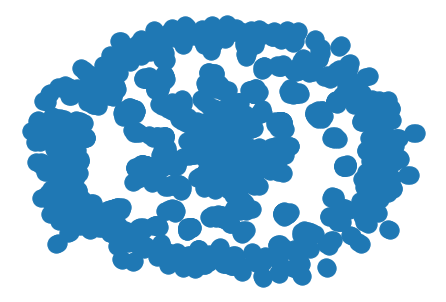

In [115]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [116]:
#first compute the best partition
from networkx.algorithms.community import greedy_modularity_communities
G = g

#Two methods for community analysis
c = greedy_modularity_communities(G)
partition = community.best_partition(G)

AttributeError: 'frozenset' object has no attribute 'best_partition'

In [ ]:
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=60, with_labels=False)

In [ ]:
num_nodes = 0
for community in c:
    num_nodes += len(community)
print(num_nodes)

In [ ]:
len(partition)

In [ ]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

In [ ]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

In [ ]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
# print(df_merged.columns.values)
df_merged.head()

In [ ]:
values = {'group_id': 500}
df_merged = df_merged.fillna(value=values)

print(df_merged['group_id'])
unique_community_ids = df_merged['group_id'].unique()
unique_community_ids

In [117]:

#Will assign all NaN's same color for now. That's okay.


import random
 
def colors(n):
    if(n == 0):
        n = 600
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    
    step = 256 / n
#     print(n,r,g,b,step)

    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    
    colorstr = str(r)+","+str(b)+"," + str(g)
    return '#%02x%02x%02x' % (r, g, b)

color_dict = []
color_dictionary = {}
for groupid in unique_community_ids:
    #generate a random color
    color = colors(groupid)
    if(groupid == 500):        
        color_dict.append({'group_id': 500, 'color_code': color})
        color_dictionary['island'] = color
    else:        
        color_dict.append({'group_id':groupid , 'color_code': color})
        color_dictionary[str(int(groupid))] = color
    
color_dict

[{'group_id': 500, 'color_code': '#8eec62'},
 {'group_id': 0.0, 'color_code': '#6b612f'},
 {'group_id': 130.0, 'color_code': '#c0722e'},
 {'group_id': 168.0, 'color_code': '#2ca32c'},
 {'group_id': 117.0, 'color_code': '#ca2cc7'},
 {'group_id': 240.0, 'color_code': '#17c298'},
 {'group_id': 128.0, 'color_code': '#138bd0'},
 {'group_id': 52.0, 'color_code': '#1b3d1f'},
 {'group_id': 198.0, 'color_code': '#1d7568'},
 {'group_id': 125.0, 'color_code': '#80ba14'},
 {'group_id': 166.0, 'color_code': '#afc9f4'},
 {'group_id': 41.0, 'color_code': '#e62b03'},
 {'group_id': 87.0, 'color_code': '#1b3a41'},
 {'group_id': 167.0, 'color_code': '#a70232'},
 {'group_id': 60.0, 'color_code': '#ca76ea'},
 {'group_id': 2.0, 'color_code': '#dbf651'},
 {'group_id': 12.0, 'color_code': '#8e92d5'},
 {'group_id': 176.0, 'color_code': '#558afc'},
 {'group_id': 254.0, 'color_code': '#9e6567'},
 {'group_id': 103.0, 'color_code': '#89b3bf'},
 {'group_id': 86.0, 'color_code': '#74a752'},
 {'group_id': 127.0, 'col

In [118]:
from IPython.display import Markdown
for color in color_dict:
    display (Markdown('<br><span style="color:' +color['color_code']+ '">Sample</span>.'))
    


<br><span style="color:#8eec62">Sample</span>.

<br><span style="color:#6b612f">Sample</span>.

<br><span style="color:#c0722e">Sample</span>.

<br><span style="color:#2ca32c">Sample</span>.

<br><span style="color:#ca2cc7">Sample</span>.

<br><span style="color:#17c298">Sample</span>.

<br><span style="color:#138bd0">Sample</span>.

<br><span style="color:#1b3d1f">Sample</span>.

<br><span style="color:#1d7568">Sample</span>.

<br><span style="color:#80ba14">Sample</span>.

<br><span style="color:#afc9f4">Sample</span>.

<br><span style="color:#e62b03">Sample</span>.

<br><span style="color:#1b3a41">Sample</span>.

<br><span style="color:#a70232">Sample</span>.

<br><span style="color:#ca76ea">Sample</span>.

<br><span style="color:#dbf651">Sample</span>.

<br><span style="color:#8e92d5">Sample</span>.

<br><span style="color:#558afc">Sample</span>.

<br><span style="color:#9e6567">Sample</span>.

<br><span style="color:#89b3bf">Sample</span>.

<br><span style="color:#74a752">Sample</span>.

<br><span style="color:#5323e2">Sample</span>.

<br><span style="color:#bae147">Sample</span>.

<br><span style="color:#37a2cf">Sample</span>.

<br><span style="color:#6aa1bf">Sample</span>.

<br><span style="color:#de1216">Sample</span>.

<br><span style="color:#f6f468">Sample</span>.

<br><span style="color:#b63974">Sample</span>.

<br><span style="color:#23ad8a">Sample</span>.

<br><span style="color:#f794cd">Sample</span>.

<br><span style="color:#3f31d7">Sample</span>.

<br><span style="color:#b52b49">Sample</span>.

<br><span style="color:#dd1ea0">Sample</span>.

<br><span style="color:#ad4931">Sample</span>.

<br><span style="color:#f676ab">Sample</span>.

<br><span style="color:#e3703c">Sample</span>.

<br><span style="color:#3d78fd">Sample</span>.

<br><span style="color:#4b7864">Sample</span>.

<br><span style="color:#8d8c9f">Sample</span>.

<br><span style="color:#b513d2">Sample</span>.

<br><span style="color:#673c70">Sample</span>.

<br><span style="color:#d6a5d5">Sample</span>.

<br><span style="color:#daafe7">Sample</span>.

<br><span style="color:#e31de4">Sample</span>.

<br><span style="color:#81a902">Sample</span>.

<br><span style="color:#33d172">Sample</span>.

<br><span style="color:#5a5870">Sample</span>.

<br><span style="color:#bf5321">Sample</span>.

<br><span style="color:#dab182">Sample</span>.

<br><span style="color:#fc9a12">Sample</span>.

<br><span style="color:#b4d437">Sample</span>.

<br><span style="color:#1e6368">Sample</span>.

<br><span style="color:#9304ce">Sample</span>.

<br><span style="color:#f7340b">Sample</span>.

<br><span style="color:#a46706">Sample</span>.

<br><span style="color:#619772">Sample</span>.

<br><span style="color:#b42b60">Sample</span>.

<br><span style="color:#cb90f7">Sample</span>.

<br><span style="color:#e45989">Sample</span>.

<br><span style="color:#582734">Sample</span>.

<br><span style="color:#438ce5">Sample</span>.

<br><span style="color:#ad1e5f">Sample</span>.

<br><span style="color:#1809dc">Sample</span>.

<br><span style="color:#986cb3">Sample</span>.

<br><span style="color:#5e001c">Sample</span>.

<br><span style="color:#8955a7">Sample</span>.

<br><span style="color:#c0a26c">Sample</span>.

<br><span style="color:#4bf3a5">Sample</span>.

<br><span style="color:#08fddd">Sample</span>.

<br><span style="color:#21fd76">Sample</span>.

<br><span style="color:#ae367f">Sample</span>.

<br><span style="color:#b3bedc">Sample</span>.

<br><span style="color:#9fefe3">Sample</span>.

<br><span style="color:#096d91">Sample</span>.

<br><span style="color:#6f1d97">Sample</span>.

<br><span style="color:#2a533f">Sample</span>.

<br><span style="color:#566095">Sample</span>.

<br><span style="color:#c873ce">Sample</span>.

<br><span style="color:#7bb096">Sample</span>.

<br><span style="color:#3f3e25">Sample</span>.

<br><span style="color:#36b6a4">Sample</span>.

<br><span style="color:#0426b1">Sample</span>.

<br><span style="color:#6e4aef">Sample</span>.

<br><span style="color:#d7bfe0">Sample</span>.

<br><span style="color:#0b30a4">Sample</span>.

<br><span style="color:#5a791a">Sample</span>.

<br><span style="color:#fb6261">Sample</span>.

<br><span style="color:#607f24">Sample</span>.

<br><span style="color:#b1de55">Sample</span>.

<br><span style="color:#8f8bee">Sample</span>.

<br><span style="color:#76a615">Sample</span>.

<br><span style="color:#472349">Sample</span>.

<br><span style="color:#d791a6">Sample</span>.

<br><span style="color:#ff1b4a">Sample</span>.

<br><span style="color:#3db061">Sample</span>.

<br><span style="color:#e4523b">Sample</span>.

<br><span style="color:#cd0405">Sample</span>.

<br><span style="color:#10cf39">Sample</span>.

<br><span style="color:#9dff43">Sample</span>.

<br><span style="color:#1e1e75">Sample</span>.

<br><span style="color:#dbe1dc">Sample</span>.

<br><span style="color:#d7ed4d">Sample</span>.

<br><span style="color:#034c23">Sample</span>.

<br><span style="color:#9de0f7">Sample</span>.

<br><span style="color:#fc6315">Sample</span>.

<br><span style="color:#9f828f">Sample</span>.

<br><span style="color:#359240">Sample</span>.

<br><span style="color:#14d44c">Sample</span>.

<br><span style="color:#c7dea9">Sample</span>.

<br><span style="color:#ad02d7">Sample</span>.

<br><span style="color:#a6f641">Sample</span>.

<br><span style="color:#126ca5">Sample</span>.

<br><span style="color:#2196f3">Sample</span>.

<br><span style="color:#595a82">Sample</span>.

<br><span style="color:#2abccc">Sample</span>.

<br><span style="color:#035514">Sample</span>.

<br><span style="color:#a66292">Sample</span>.

<br><span style="color:#689bd3">Sample</span>.

<br><span style="color:#e1d4bc">Sample</span>.

<br><span style="color:#a20386">Sample</span>.

<br><span style="color:#8b36b2">Sample</span>.

<br><span style="color:#011314">Sample</span>.

<br><span style="color:#fda3c4">Sample</span>.

<br><span style="color:#3620b2">Sample</span>.

<br><span style="color:#c0fec2">Sample</span>.

<br><span style="color:#0780af">Sample</span>.

<br><span style="color:#e211b3">Sample</span>.

<br><span style="color:#2e08eb">Sample</span>.

<br><span style="color:#91ee37">Sample</span>.

<br><span style="color:#0f1329">Sample</span>.

<br><span style="color:#3db1ae">Sample</span>.

<br><span style="color:#352460">Sample</span>.

<br><span style="color:#ce8d1f">Sample</span>.

<br><span style="color:#e59691">Sample</span>.

<br><span style="color:#e25483">Sample</span>.

<br><span style="color:#6580d0">Sample</span>.

<br><span style="color:#55c3db">Sample</span>.

<br><span style="color:#03e4d2">Sample</span>.

<br><span style="color:#4bb37f">Sample</span>.

<br><span style="color:#5ee62b">Sample</span>.

<br><span style="color:#3ef141">Sample</span>.

<br><span style="color:#4b2e7a">Sample</span>.

<br><span style="color:#60443d">Sample</span>.

<br><span style="color:#5ca5b4">Sample</span>.

<br><span style="color:#f0756c">Sample</span>.

<br><span style="color:#6d5cd4">Sample</span>.

<br><span style="color:#882355">Sample</span>.

<br><span style="color:#459fba">Sample</span>.

<br><span style="color:#4453ca">Sample</span>.

<br><span style="color:#61d5ca">Sample</span>.

<br><span style="color:#335160">Sample</span>.

<br><span style="color:#917535">Sample</span>.

<br><span style="color:#44a18c">Sample</span>.

<br><span style="color:#735347">Sample</span>.

<br><span style="color:#9181bb">Sample</span>.

<br><span style="color:#cdef5a">Sample</span>.

<br><span style="color:#aa4b4b">Sample</span>.

<br><span style="color:#c44aea">Sample</span>.

<br><span style="color:#6aa8af">Sample</span>.

<br><span style="color:#266fef">Sample</span>.

<br><span style="color:#396e3a">Sample</span>.

<br><span style="color:#ce833b">Sample</span>.

<br><span style="color:#13748f">Sample</span>.

<br><span style="color:#11ab54">Sample</span>.

<br><span style="color:#0eb54a">Sample</span>.

<br><span style="color:#8c283b">Sample</span>.

<br><span style="color:#dad2d8">Sample</span>.

<br><span style="color:#ee198e">Sample</span>.

<br><span style="color:#5e252a">Sample</span>.

<br><span style="color:#104038">Sample</span>.

<br><span style="color:#2b29cd">Sample</span>.

<br><span style="color:#efca81">Sample</span>.

<br><span style="color:#2750e4">Sample</span>.

<br><span style="color:#b8a697">Sample</span>.

<br><span style="color:#884b40">Sample</span>.

<br><span style="color:#accabf">Sample</span>.

<br><span style="color:#7eb57a">Sample</span>.

<br><span style="color:#ee9f80">Sample</span>.

<br><span style="color:#f34309">Sample</span>.

<br><span style="color:#3ca20f">Sample</span>.

<br><span style="color:#31c167">Sample</span>.

<br><span style="color:#48ffd2">Sample</span>.

<br><span style="color:#a58bac">Sample</span>.

<br><span style="color:#a54834">Sample</span>.

<br><span style="color:#06bbde">Sample</span>.

<br><span style="color:#53cf93">Sample</span>.

<br><span style="color:#5fa00c">Sample</span>.

<br><span style="color:#c2904f">Sample</span>.

<br><span style="color:#914b94">Sample</span>.

<br><span style="color:#fb130c">Sample</span>.

<br><span style="color:#ea8567">Sample</span>.

<br><span style="color:#045ef4">Sample</span>.

<br><span style="color:#aa58d4">Sample</span>.

<br><span style="color:#a61844">Sample</span>.

<br><span style="color:#36a357">Sample</span>.

<br><span style="color:#d4ed9c">Sample</span>.

<br><span style="color:#32f728">Sample</span>.

<br><span style="color:#f5aa70">Sample</span>.

<br><span style="color:#dba1fd">Sample</span>.

<br><span style="color:#a5d4b8">Sample</span>.

<br><span style="color:#b1d89a">Sample</span>.

<br><span style="color:#8245f1">Sample</span>.

<br><span style="color:#257faf">Sample</span>.

<br><span style="color:#fd35c7">Sample</span>.

<br><span style="color:#c56ce0">Sample</span>.

<br><span style="color:#698510">Sample</span>.

<br><span style="color:#01f226">Sample</span>.

<br><span style="color:#d79128">Sample</span>.

<br><span style="color:#b62b7d">Sample</span>.

<br><span style="color:#3aa670">Sample</span>.

<br><span style="color:#5f717c">Sample</span>.

<br><span style="color:#b9fe3d">Sample</span>.

<br><span style="color:#b30379">Sample</span>.

<br><span style="color:#16ef5b">Sample</span>.

<br><span style="color:#b56bc3">Sample</span>.

<br><span style="color:#31551a">Sample</span>.

<br><span style="color:#feb4cc">Sample</span>.

<br><span style="color:#48bc89">Sample</span>.

<br><span style="color:#caa65d">Sample</span>.

<br><span style="color:#9f07be">Sample</span>.

<br><span style="color:#da9005">Sample</span>.

<br><span style="color:#7dcb70">Sample</span>.

<br><span style="color:#d0af40">Sample</span>.

<br><span style="color:#1f42e1">Sample</span>.

<br><span style="color:#3967b3">Sample</span>.

<br><span style="color:#ceba5a">Sample</span>.

<br><span style="color:#0649fc">Sample</span>.

<br><span style="color:#823845">Sample</span>.

<br><span style="color:#b55bb9">Sample</span>.

<br><span style="color:#dab41b">Sample</span>.

<br><span style="color:#8fafc4">Sample</span>.

<br><span style="color:#22a0f5">Sample</span>.

<br><span style="color:#e9c578">Sample</span>.

<br><span style="color:#e1d3cb">Sample</span>.

<br><span style="color:#9bdaaf">Sample</span>.

<br><span style="color:#c23c2e">Sample</span>.

<br><span style="color:#b823dc">Sample</span>.

<br><span style="color:#d6b3d4">Sample</span>.

<br><span style="color:#db7234">Sample</span>.

<br><span style="color:#7a25e2">Sample</span>.

<br><span style="color:#eaf668">Sample</span>.

<br><span style="color:#bfc8f5">Sample</span>.

<br><span style="color:#b20703">Sample</span>.

<br><span style="color:#1ea3a3">Sample</span>.

<br><span style="color:#c3ba7e">Sample</span>.

<br><span style="color:#4bbf05">Sample</span>.

<br><span style="color:#6ff2bf">Sample</span>.

<br><span style="color:#dca1fd">Sample</span>.

<br><span style="color:#5d5367">Sample</span>.

<br><span style="color:#289a17">Sample</span>.

<br><span style="color:#5f8220">Sample</span>.

<br><span style="color:#48d1a2">Sample</span>.

<br><span style="color:#cc5c0b">Sample</span>.

<br><span style="color:#87936c">Sample</span>.

<br><span style="color:#cb3c18">Sample</span>.

<br><span style="color:#f45b5b">Sample</span>.

<br><span style="color:#c78596">Sample</span>.

<br><span style="color:#40c8ca">Sample</span>.

<br><span style="color:#38c955">Sample</span>.

<br><span style="color:#b3938a">Sample</span>.

<br><span style="color:#030005">Sample</span>.

<br><span style="color:#c46a8b">Sample</span>.

<br><span style="color:#5e2b62">Sample</span>.

<br><span style="color:#ab0d68">Sample</span>.

<br><span style="color:#79d0fe">Sample</span>.

<br><span style="color:#853518">Sample</span>.

<br><span style="color:#adb8b9">Sample</span>.

<br><span style="color:#d067b9">Sample</span>.

<br><span style="color:#080535">Sample</span>.

<br><span style="color:#fdce5e">Sample</span>.

<br><span style="color:#c639ed">Sample</span>.

<br><span style="color:#40b4e1">Sample</span>.

<br><span style="color:#ef9774">Sample</span>.

<br><span style="color:#57a7a7">Sample</span>.

In [119]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2728, 173)


,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,group_id,color_code
0,arms-cross,arms-cross,J_01_098,NaN,3.467,2.177,-0.458,30,0,3.400,...,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,500.0,#8eec62
1,raise-hand,raise-hand,H_02_048,NaN,5.154,1.891,0.544,28,0,5.500,...,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,500.0,#8eec62
2,sigh,sigh,H_03_086,NaN,3.931,1.751,-0.196,30,0,3.267,...,sigh\t,0,3,0,3,NaN,sigh\t,0,500.0,#8eec62
3,1_dollar,1_dollar,C_02_025,NaN,3.034,1.500,-0.775,29,0,2.944,...,DOLLAR,9,0,9,0,NaN,DOLLAR,0,500.0,#8eec62
4,5_dollars,5_dollars,B_01_062,NaN,5.120,1.716,0.302,25,0,5.214,...,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,0.0,#6b612f


In [120]:
df_merged_with_color.shape

(2728, 173)

In [121]:
#Need only 3 columsn for now
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2728, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,arms-cross,J_01_098,500.0,#8eec62,-0.458
1,raise-hand,H_02_048,500.0,#8eec62,0.544
2,sigh,H_03_086,500.0,#8eec62,-0.196
3,1_dollar,C_02_025,500.0,#8eec62,-0.775
4,5_dollars,B_01_062,0.0,#6b612f,0.302
5,8_hour,C_02_055,500.0,#8eec62,-0.043
6,9_oclock,C_02_080,130.0,#c0722e,-0.126
7,a-line_bob,K_03_127,168.0,#2ca32c,-0.198
8,a_little_bit,H_03_025,117.0,#ca2cc7,-0.762
9,abbreviate,G_01_040,240.0,#17c298,0.669


In [122]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [123]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_01_002,B_01_062
1,A_01_002,C_03_023
2,A_01_002,F_02_088
3,A_01_002,H_03_004
4,A_01_002,J_03_046


In [124]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_01_002', 'source': 'B_01_062'}

In [125]:
df_sign

,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,SignBankReferenceID,SignBankLemmaID,SignBankAnnotationID,SignBankSemanticField,SignBankEnglishTranslations,Complexity
0,&=arms-cross,&=arms-cross,J_01_098,"<iframe width=""280"" height=""158"" src=""https://...",3.467,2.177,-0.458,30,0,3.400,...,0,2,NaN,&=arms-cross,1961.0,&=arms-cross,NaN,None,"action, arms crossed, stern look, what, what h...",4.0
1,&=raise-hand,&=raise-hand,H_02_048,"<iframe width=""280"" height=""158"" src=""https://...",5.154,1.891,0.544,28,0,5.500,...,0,2,NaN,&=raise-hand,1954.0,&=raise-hand,NaN,None,"action, I have a question, me, raise hand, vol...",2.0
2,&=sigh,&=sigh,H_03_086,"<iframe width=""280"" height=""158"" src=""https://...",3.931,1.751,-0.196,30,0,3.267,...,0,2,NaN,&=sigh,1957.0,&=sigh,NaN,None,"action, exasperated, I didn't mean that, I giv...",2.0
3,1_dollar,1_dollar,C_02_025,"<iframe width=""280"" height=""158"" src=""https://...",3.034,1.500,-0.775,29,0,2.944,...,383,0,NaN,DOLLAR,1268.0,1_DOLLAR,DOLLAR,None,"bill, cash, dollar, money",2.0
4,5_dollars,5_dollars,B_01_062,"<iframe width=""280"" height=""158"" src=""https://...",5.120,1.716,0.302,25,0,5.214,...,190,4,NaN,FIVE-DOLLARS,2436.0,5_DOLLAR,FIVE-DOLLARS,Number,"dollar, five dollars, money",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,zero,zero,D_03_036,"<iframe width=""280"" height=""158"" src=""https://...",4.192,1.415,0.051,26,0,4.313,...,482,5,NaN,ZERO,1478.0,ZERO,ZERO,Number,"0, none, number, zero, zilch",1.0
2724,zipper,zipper,D_01_034,"<iframe width=""280"" height=""158"" src=""https://...",3.148,1.610,-0.556,27,0,2.875,...,165,0,NaN,ZIPPER,94.0,ZIPPER,ZIPPER,None,"coat, jacket, zipper",1.0
2725,zoo,zoo,E_03_042,"<iframe width=""280"" height=""158"" src=""https://...",3.533,1.776,-0.346,30,0,3.857,...,137,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2726,zoom_in,zoom_in,B_02_056,"<iframe width=""280"" height=""158"" src=""https://...",3.958,1.781,-0.443,24,0,3.929,...,524,0,zoom_in,ZOOM-IN,3114.0,ZOOM-IN,NaN,Event,"computer screen, enlarge, expand, make bigger,...",1.0


In [126]:
#### Get rid of morpheme columbs
print(len(df_default.columns.values))
df_sign = df_sign[['YouTube Video','Code','SignBankEnglishTranslations']]
df_sign = df_sign.rename(columns={"YouTube Video": "video"}, errors="raise")
df_sign.head()
df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_default
filtered = test_df.filter(regex='M..2.0|Video')
no_morphemes_df = test_df[test_df.columns.drop(filtered.columns.values)]
# len(no_morphemes_df.columns.values)


173


In [127]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr:
        categorical_attr.append(column)   
# print(numerical_attr)
# print(categorical_attr)

In [128]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    constraints[attr]['min'] = math.floor(min(columnsData.values))
    constraints[attr]['max'] = math.ceil(max(columnsData.values))

pprint.pprint(constraints)

{'ClipLength(ms)': {'max': 3737, 'min': 701},
 'Compound.2.0': {'max': 1, 'min': 0},
 'Contact.2.0': {'max': 1, 'min': 0},
 'Contact.2.0Frequency': {'max': 1694, 'min': 1030},
 'D.Iconicity(M) all': {'max': 7, 'min': 1},
 'D.Iconicity(M) native': {'max': 7, 'min': 1},
 'D.Iconicity(N) all': {'max': 31, 'min': 26},
 'D.Iconicity(N) native': {'max': 22, 'min': 18},
 'D.Iconicity(SD) all': {'max': 3, 'min': 0},
 'D.Iconicity(SD) native': {'max': 3, 'min': 0},
 'D.Iconicity(Z) all': {'max': 3, 'min': -2},
 'D.Iconicity(Z) native': {'max': 3, 'min': -2},
 'DominantTranslation': ['immersed',
                         'castle_2',
                         'set_up',
                         'float',
                         'champion',
                         'shiny',
                         'off_the_point',
                         'potato',
                         'smell_money',
                         'cook',
                         'pageant',
                         'move_down',
      

                                   'all gone, depleted, empty, finished, gone, '
                                   'none, nothing, zilch, all-gone',
                                   'agent, athlete, person, play, player, '
                                   'sports',
                                   'acquire, acquisition, pick up',
                                   'flip-flops, sandals, shoes, thong sandals',
                                   'gentle, soft, softly',
                                   '0, none, number, zero, zilch',
                                   'carrot',
                                   'complain, complaint, object, protest, '
                                   'whine',
                                   'abortion, discard, remove, take away, take '
                                   'out, throw away',
                                   'break, holiday, rest, vacation, VACATION5',
                                   'constraint, delimit, limit, limitation,

                                   'bandage, gauze, covering, wrap',
                                   'a range of, a variety of, from here to '
                                   'there, gradient, range, register, scope, '
                                   'to, variation',
                                   'windmill',
                                   'create, make, MAKEstr, manufacture, '
                                   'produce',
                                   'interrogative, pronoun, what, WHATix',
                                   'blah blah blah, speak, speaking, talk, '
                                   'talking mouth, yada yada',
                                   'sell, shopping, store',
                                   'computer, computer mouse, desktop, mouse',
                                   "dislike, do not like, don't like",
                                   'coffee, drink',
                                   'hammer, nail, tool',
                      

                  'SANDALS',
                  'TOSS-OUT',
                  'SUPERIOR',
                  'SKIRT',
                  'RECORD',
                  'COMB',
                  'PITY',
                  'SERIOUS',
                  'MAKEstr',
                  'SLAVE',
                  'GAY',
                  'AUTISM',
                  'HAT-BRIMasym\t',
                  'DOOR',
                  'LIVE',
                  'MINUTEb',
                  'STETHOSCOPEearch\t',
                  'PEPSIdown',
                  'COMPUTER-MOUSE',
                  'DREAM',
                  'SINCE',
                  'VOICE',
                  'CABINET',
                  'EARx',
                  'WORRY',
                  'GUN',
                  'RUNasym',
                  'SHORT',
                  'PLAIN',
                  'HOT',
                  'STEAL',
                  'FINGERSPELL',
                  'LAWNMOWER',
                  'ORANGE',
                  'UNDERGRA

             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/76VPmzsrJt8?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/Ev9cE4fWjPs?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/ihNVBaY4sxQ?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/D6cJborRiuw?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/GvrwxG1kHG4?rel=0&amp;controls=0&amp;showinfo=0" '
             'framebord

             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/SITUAbRv2ug?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/YB78O3IO0ow?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/Us2N1Q14MVo?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/CyAXoFvPXEg?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/q3VGw5amJqs?rel=

             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/VoiJMa5ccVI?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/hvARqSFpw0k?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/wBL8uJhwr7Y?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/h0XC4tACEpE?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/_k6orLH9lns?rel=0&amp;controls=0&amp;showinfo=0" '
             'framebord

             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/7fwcc-8J-E8?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/0QAKB_xHf5I?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/g5Ptm55_zy8?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/vX0ndANytFY?rel=0&amp;controls=0&amp;showinfo=0" '
             'frameborder="0" allowfullscreen></iframe>',
             '<iframe width="280" height="158" '
             'src="https://www.youtube.com/embed/4UPtpQ72m5s?rel=0&amp;controls=0&amp;showinfo=0" '
             'framebord

In [129]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': 'arms-cross',
 'Code': 'J_01_098',
 'group_id': 500.0,
 'color_code': '#8eec62',
 'SignFrequency(Z)': -0.458}

In [130]:
no_morphemes_df[no_morphemes_df['Code'].isin(df_default["Code"].values)]


,EntryID,LemmaID,Code,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),SignFrequency(SD-Native),...,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,video_x,SignBankEnglishTranslations_x,video_y,SignBankEnglishTranslations_y
0,arms-cross,arms-cross,J_01_098,3.467,2.177,-0.458,30,0,3.400,2.293,...,3,0,3,NaN,arms-cross\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, arms crossed, stern look, what, what h...","<iframe width=""280"" height=""158"" src=""https://...","action, arms crossed, stern look, what, what h..."
1,raise-hand,raise-hand,H_02_048,5.154,1.891,0.544,28,0,5.500,1.446,...,3,0,3,NaN,raise-hand\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, I have a question, me, raise hand, vol...","<iframe width=""280"" height=""158"" src=""https://...","action, I have a question, me, raise hand, vol..."
2,sigh,sigh,H_03_086,3.931,1.751,-0.196,30,0,3.267,1.624,...,3,0,3,NaN,sigh\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, exasperated, I didn't mean that, I giv...","<iframe width=""280"" height=""158"" src=""https://...","action, exasperated, I didn't mean that, I giv..."
3,1_dollar,1_dollar,C_02_025,3.034,1.500,-0.775,29,0,2.944,1.474,...,0,9,0,NaN,DOLLAR,0,"<iframe width=""280"" height=""158"" src=""https://...","bill, cash, dollar, money","<iframe width=""280"" height=""158"" src=""https://...","bill, cash, dollar, money"
4,5_dollars,5_dollars,B_01_062,5.120,1.716,0.302,25,0,5.214,1.847,...,4,8,4,NaN,FIVE-DOLLARS,5,"<iframe width=""280"" height=""158"" src=""https://...","dollar, five dollars, money","<iframe width=""280"" height=""158"" src=""https://...","dollar, five dollars, money"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,zero,zero,D_03_036,4.192,1.415,0.051,26,0,4.313,1.138,...,5,19,5,NaN,ZERO,6,"<iframe width=""280"" height=""158"" src=""https://...","0, none, number, zero, zilch","<iframe width=""280"" height=""158"" src=""https://...","0, none, number, zero, zilch"
2724,zipper,zipper,D_01_034,3.148,1.610,-0.556,27,0,2.875,1.310,...,0,0,0,NaN,ZIPPER,0,"<iframe width=""280"" height=""158"" src=""https://...","coat, jacket, zipper","<iframe width=""280"" height=""158"" src=""https://...","coat, jacket, zipper"
2725,zoo,zoo,E_03_042,3.533,1.776,-0.346,30,0,3.857,1.916,...,3,4,3,NaN,NaN,3,"<iframe width=""280"" height=""158"" src=""https://...",NaN,"<iframe width=""280"" height=""158"" src=""https://...",NaN
2726,zoom_in,zoom_in,B_02_056,3.958,1.781,-0.443,24,0,3.929,1.492,...,0,38,0,zoom_in,ZOOM-IN\t,0,"<iframe width=""280"" height=""158"" src=""https://...","computer screen, enlarge, expand, make bigger,...","<iframe width=""280"" height=""158"" src=""https://...","computer screen, enlarge, expand, make bigger,..."


In [131]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("scripts-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('scripts-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('scripts-data/sign_props.json', orient='records')


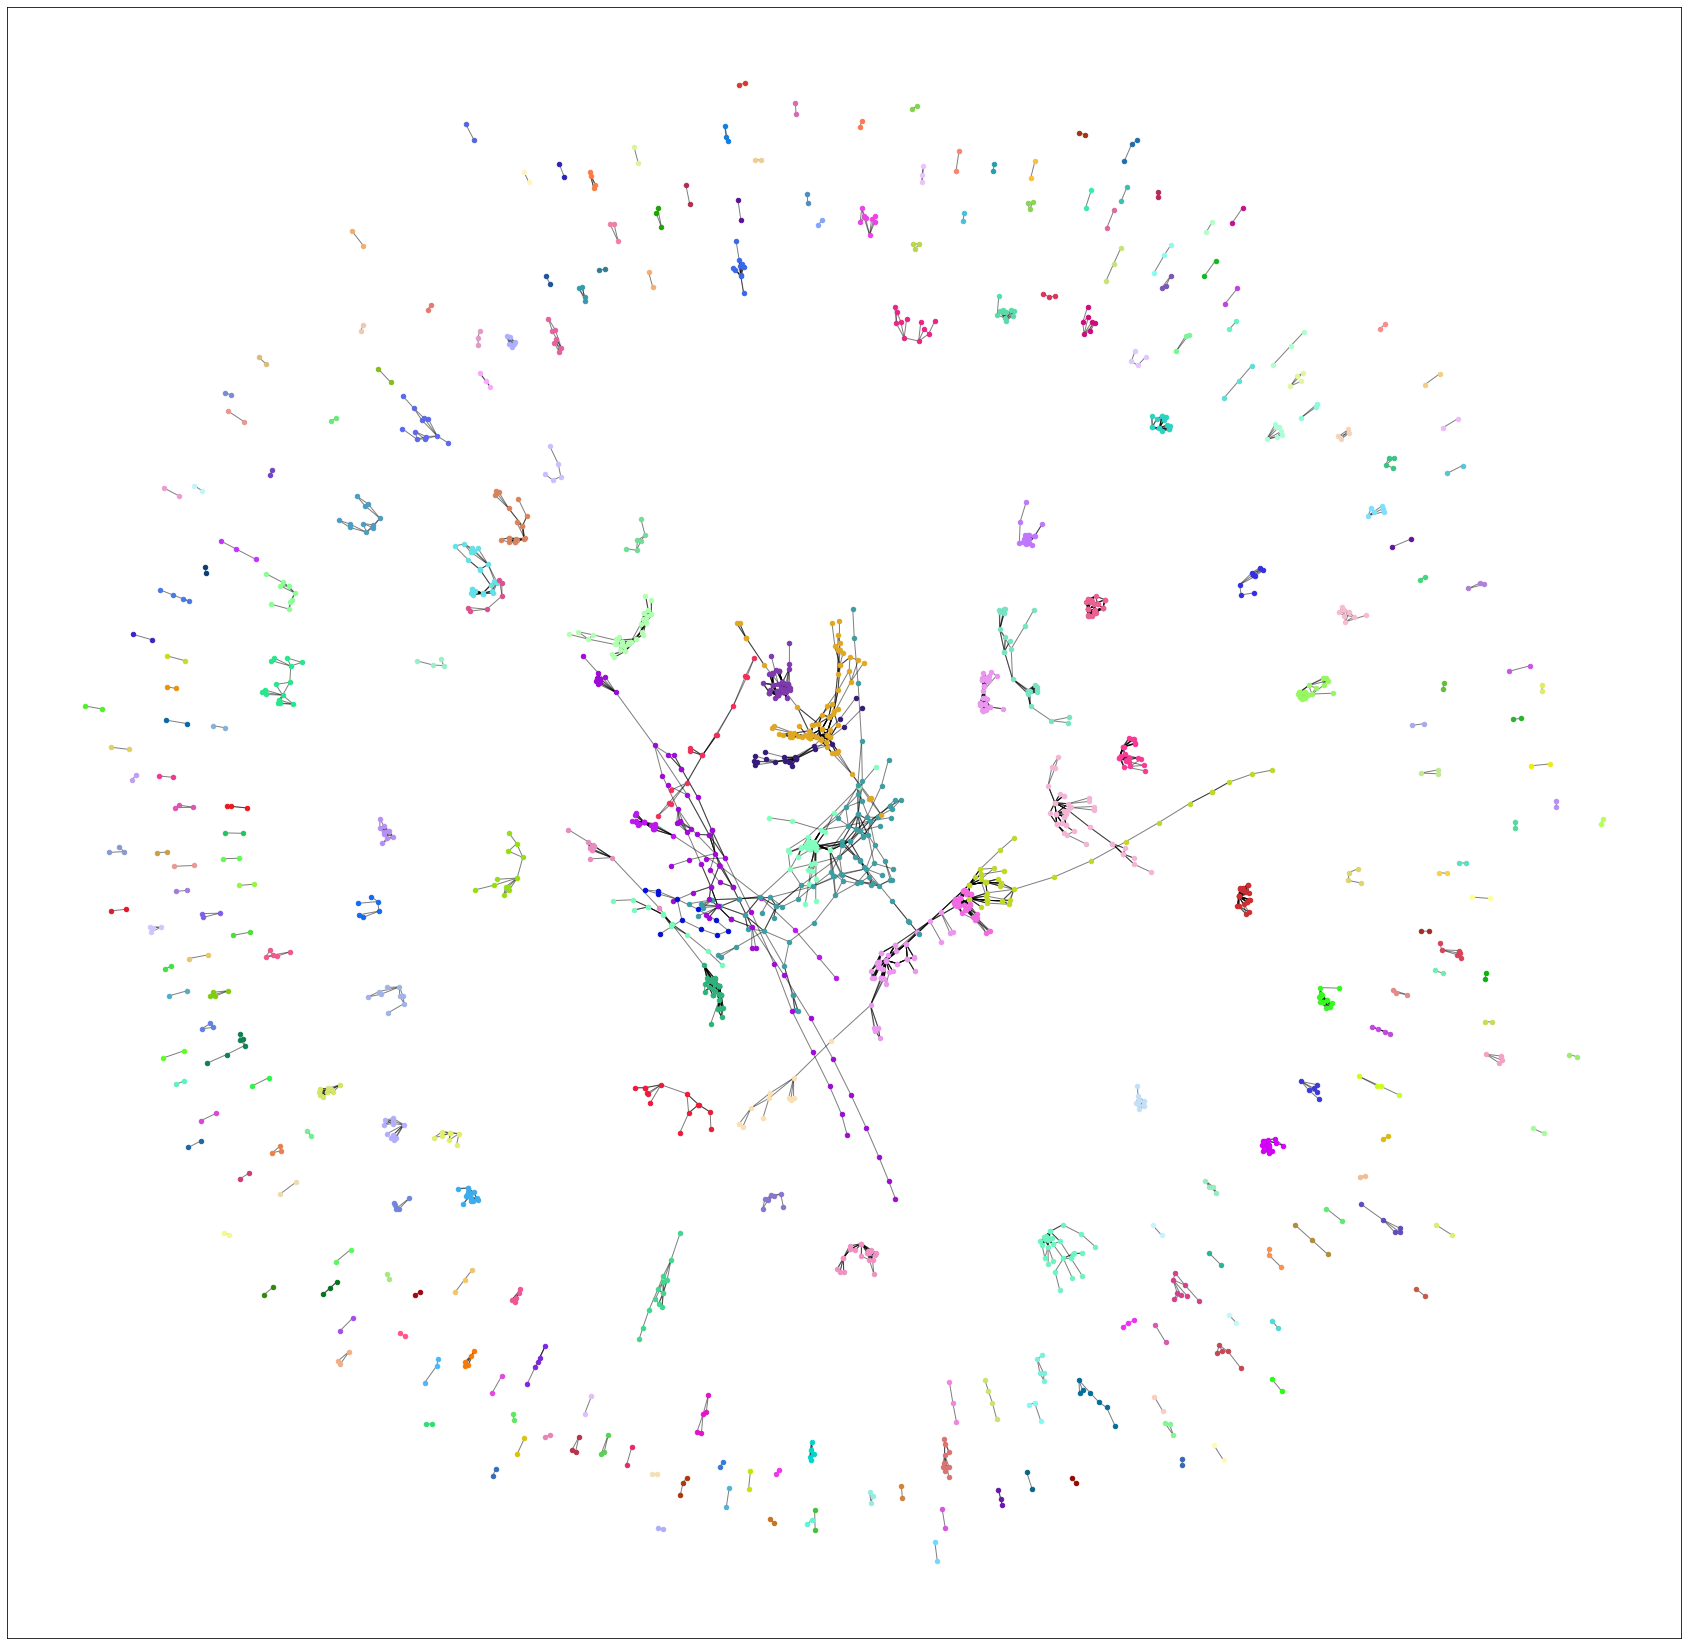

In [132]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [133]:
## Code to change color in json
color_dictionary


{'island': '#8eec62',
 '0': '#6b612f',
 '130': '#c0722e',
 '168': '#2ca32c',
 '117': '#ca2cc7',
 '240': '#17c298',
 '128': '#138bd0',
 '52': '#1b3d1f',
 '198': '#1d7568',
 '125': '#80ba14',
 '166': '#afc9f4',
 '41': '#e62b03',
 '87': '#1b3a41',
 '167': '#a70232',
 '60': '#ca76ea',
 '2': '#dbf651',
 '12': '#8e92d5',
 '176': '#558afc',
 '254': '#9e6567',
 '103': '#89b3bf',
 '86': '#74a752',
 '127': '#5323e2',
 '10': '#bae147',
 '4': '#37a2cf',
 '9': '#6aa1bf',
 '64': '#de1216',
 '177': '#f6f468',
 '17': '#b63974',
 '77': '#23ad8a',
 '196': '#f794cd',
 '55': '#3f31d7',
 '146': '#b52b49',
 '139': '#dd1ea0',
 '97': '#ad4931',
 '89': '#f676ab',
 '101': '#e3703c',
 '92': '#3d78fd',
 '13': '#4b7864',
 '24': '#8d8c9f',
 '179': '#b513d2',
 '141': '#673c70',
 '81': '#d6a5d5',
 '154': '#daafe7',
 '59': '#e31de4',
 '38': '#81a902',
 '170': '#33d172',
 '29': '#5a5870',
 '21': '#bf5321',
 '1': '#dab182',
 '45': '#fc9a12',
 '51': '#b4d437',
 '192': '#1e6368',
 '100': '#9304ce',
 '152': '#f7340b',
 '82

In [134]:
def filter_dict(d, filter_string):
#     print(filter_string)
    for key, val in d.items():
        if filter_string != key:
            continue
        return key, val

with open('../../visualization/data/graph.json') as graph_json_file:
    data = json.load(graph_json_file)
    for node in data['nodes']:
        if(node['group_id'] is None):
            node['group_id']= "island"    
#             print(node)
    
    for node in data['nodes']:
        key,val = filter_dict(color_dictionary, str(node['group_id']))
        node['color_code'] = val
#         print(node)


In [135]:
#Resave as JSON

graph = {
    "nodes" : data['nodes'],
    "links": data['links']
}

with open("scripts-data/graph.json", 'w') as file:
    json.dump(graph, file)